In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os
import random
# import sys

# librosa is a Python library for analyzing audio and music. 
import librosa
import librosa.display
# import librosa.display.waveplot # seems to not exist anymore


# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# to play the audio files
import IPython.display as ipd



In [2]:
"""#Paths listed out


#Bea - Female
"/EmoV-DB_sorted/bea/Amused"
"/EmoV-DB_sorted/bea/Angry"
"/EmoV-DB_sorted/bea/Disgusted"
"/EmoV-DB_sorted/bea/Neutral"
"/EmoV-DB_sorted/bea/Sleepy"

#Jenie - Female
"/EmoV-DB_sorted/jenie/Amused"
"/EmoV-DB_sorted/jenie/Angry"
"/EmoV-DB_sorted/jenie/Disgusted"
"/EmoV-DB_sorted/jenie/Neutral"
"/EmoV-DB_sorted/jenie/Sleepy"


#Josh - Male
"/EmoV-DB_sorted/josh/Amused"
"/EmoV-DB_sorted/josh/Neutral"
"/EmoV-DB_sorted/josh/Sleepy"


#Sam - Male
"/EmoV-DB_sorted/sam/Amused"
"/EmoV-DB_sorted/sam/Angry"
"/EmoV-DB_sorted/sam/Disgusted"
"/EmoV-DB_sorted/sam/Neutral"
"/EmoV-DB_sorted/sam/Sleepy"
"""

# Don't delete! can be used for easy random path for selection

# rand_dir = 


# random_file = random.choice(os.listdir(rand_dir))




'#Paths listed out\n\n\n#Bea - Female\n"/EmoV-DB_sorted/bea/Amused"\n"/EmoV-DB_sorted/bea/Angry"\n"/EmoV-DB_sorted/bea/Disgusted"\n"/EmoV-DB_sorted/bea/Neutral"\n"/EmoV-DB_sorted/bea/Sleepy"\n\n#Jenie - Female\n"/EmoV-DB_sorted/jenie/Amused"\n"/EmoV-DB_sorted/jenie/Angry"\n"/EmoV-DB_sorted/jenie/Disgusted"\n"/EmoV-DB_sorted/jenie/Neutral"\n"/EmoV-DB_sorted/jenie/Sleepy"\n\n\n#Josh - Male\n"/EmoV-DB_sorted/josh/Amused"\n"/EmoV-DB_sorted/josh/Neutral"\n"/EmoV-DB_sorted/josh/Sleepy"\n\n\n#Sam - Male\n"/EmoV-DB_sorted/sam/Amused"\n"/EmoV-DB_sorted/sam/Angry"\n"/EmoV-DB_sorted/sam/Disgusted"\n"/EmoV-DB_sorted/sam/Neutral"\n"/EmoV-DB_sorted/sam/Sleepy"\n'

In [3]:
Emo_path = 'EmoV-DB_sorted/'
emo_actor_list = os.listdir(Emo_path) 
emo_actor_list.sort

file_actor = []
file_emotion = []
file_path = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 
    
        for emotions in actor:
            if emotions.startswith('.'):
                pass
            else:
                emotion = os.listdir(Emo_path + dir + '/' + emotions) 
                for file in emotion:
                    file_emotion.append(emotions.lower())
                    file_path.append(Emo_path + dir + '/' + emotions  + '/' + file)
                    file_actor.append(dir)
     

In [4]:
print(f'Number oaf file paths: {len(file_path)},\
      Number of emotions listed: {len(file_emotion)},\
      Number of actors listed: {len(file_actor)}')

Number oaf file paths: 6893,      Number of emotions listed: 6893,      Number of actors listed: 6893


In [5]:
df = pd.DataFrame({"file_path" : file_path, "actor" : file_actor})
df["sex"] = df["actor"].apply(lambda x: "female" if x in ["jenie", "bea"] else 'male')
df["emotion"] = (file_emotion)

df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/amused_1-28_0022.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/amused_29-56_0039.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/amused_57-84_0066.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/amused_57-84_0072.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/amused_281-308_0287.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/sleepiness_225-252_...,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/sleepiness_57-84_00...,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/sleepiness_113_140_...,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/sleepiness_197-224_...,josh,male,sleepy


### Creating a Larger Dataset with Randomized Filtering (Maybe? If I have Time )
# Ask Scrum Group!!!


In [6]:
# Will come back to this for a more polished final product

# 1 will add noise to many  randomized files (in random amounts but not enough to drown out speech)
# 2 Randomly pitch up/ down data by a variable percentage (again not enough to make incomprehensable)
# 3 Speed up/slow down (while maintaining pitch) by up to 50%
# Can do a few passthroughs of dataset 
# Randomly assign 1,2, 3 or a combination to a file 

In [7]:
# Should I then  go through data and make it noisier/pitch up and down/ speed up and down to add 
# extra data to help with training?

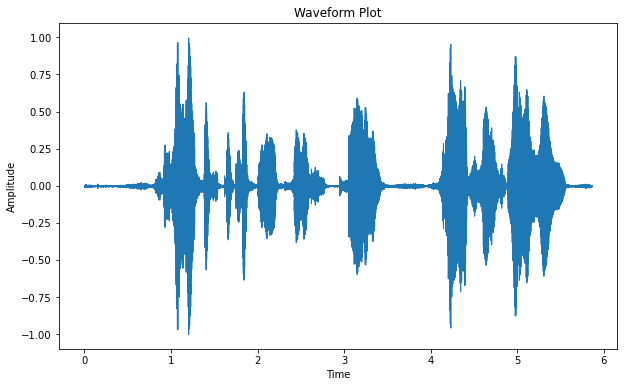

In [40]:
file_name='EmoV-DB_sorted/sam/Amused/amused_1-28_0002.wav'



audio_data, sampling_rate = librosa.load(file_name)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(audio_data,sr=sampling_rate)
# ipd.Audio(file_name)
ax.set(title='Waveform Plot', ylabel='Amplitude')
ax.label_outer();
# plt.savefig('img/waveforms/sam_amused_1-28_0002')





In [9]:



#Once df completed 
        #go through each file path and for every WAV file make into spectogram for analysis??
        #go through each file path and for every WAV file create time series and a waveform graph?? 
        #maybe it could work by just analyzing the waveform image itself
            #break into one second chunks? anything that doesnt go above a background noise sound level 
                      #is ignored and last state detected is held as current emotion
        
        
        


### Low Hanging Fruit Visuals

In [10]:
#once We have all data and its been combined with artifical data do some low hanging fruit models
#Bar graph of percent of data that is each emotion
#Male vs female
#Each actor's percent of total
#each actor's percent of each emotion

In [11]:
#Perform test train split - .25% test

In [12]:
#Consider switch to google colab for processing power

#Baseline Idea.  if line/waveform do multinomial naive bayes
# images unforuntately have to do a cnn